# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [14]:
# to remove or ignore the warnings

import warnings
warnings.filterwarnings('ignore')

# Load CSV File

In [2]:
cc_ds = pd.read_csv("creditcard.csv")

In [3]:
cc_ds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
cc_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
cc_ds.shape

(284807, 31)

# Data Cleaning

In [7]:
# check information about columns

cc_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Handling Null Values

In [8]:
print("\nColumns with missing value\n") 
print(cc_ds.isnull().any())


Columns with missing value

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


In [6]:
cc_ds.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# check no of classes

cc_ds.Class.unique()

array([0, 1], dtype=int64)

# Check Whether the classes are balanced or not


In [10]:
# '''
# o non-fraud transaction
# 1 fraud transaction
# '''

In [11]:
# count samples based on labels

cc_ds.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
# by looking values above dataset is imbalanced

cc_ds.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

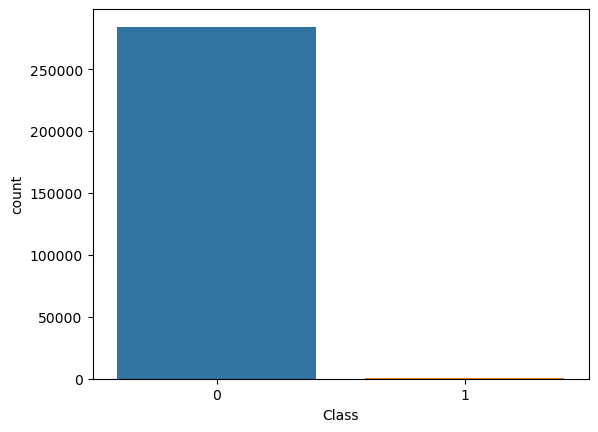

In [15]:
sns.countplot(cc_ds.Class)
plt.show()

In [16]:
# drop Time and Amount columns

cc_ds_1=cc_ds.drop(['Time','Amount'],axis=1)

In [19]:
# split the data x(features) and y(labels)

x=cc_ds_1.drop('Class',axis=1)
y=cc_ds_1['Class']

# Test and Train the Data

In [20]:
# splitting x and y into training testing sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((227845, 28), (56962, 28), (227845,), (56962,))

In [24]:
# create logisting model

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

# Regression

# Logistic Regression

In [25]:
# scroe for training set

y_train_pred = log_model.predict(x_train)
train_score = accuracy_score(y_train, y_train_pred)
print('Training Set Score : ', train_score)

# score for testing set

y_test_pred = log_model.predict(x_test)
test_score = accuracy_score(y_test, y_test_pred)
print('Testing Set score : ', test_score)

Training Set Score :  0.999188044503939
Testing Set score :  0.9992099996488887


# Classification Evaluation Matrics

# Confustion Matrix

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 [Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')],
 [Text(0, 0.5, 'Non-Fraud'), Text(0, 1.5, 'Fraud')]]

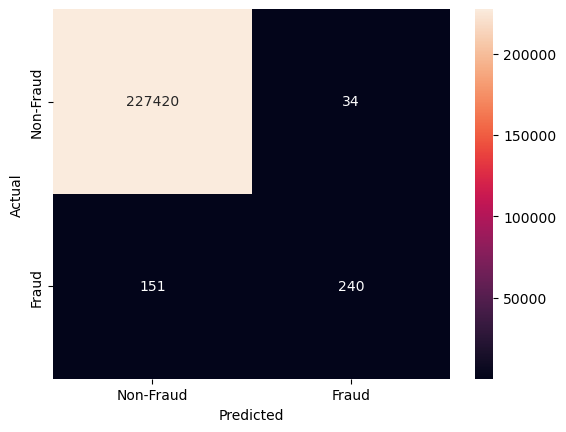

In [26]:
# Confustion Matrix for training set

train_cm = confusion_matrix(y_train, y_train_pred)
# print(train_cm)
ticks = ['Non-Fraud', 'Fraud']
sns.heatmap(train_cm, annot=True, fmt='').set(xlabel='Predicted', ylabel='Actual', xticklabels=ticks, yticklabels=ticks)


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 [Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')],
 [Text(0, 0.5, 'Non-Fraud'), Text(0, 1.5, 'Fraud')]]

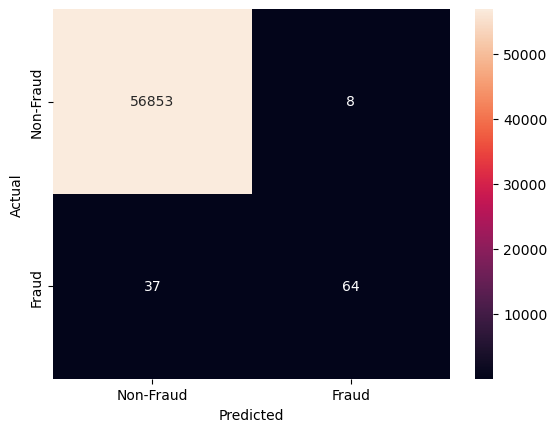

In [27]:
# Confustion Matrix for testing set

test_cm = confusion_matrix(y_test, y_test_pred)
# print(train_cm)
ticks = ['Non-Fraud', 'Fraud']
sns.heatmap(test_cm, annot=True, fmt='').set(xlabel='Predicted', ylabel='Actual', xticklabels=ticks, yticklabels=ticks)


In [28]:
# precision for training set
# y_train_pred = log_model.predict(x_train)
train_precision = precision_score(y_train, y_train_pred)
print('Training Set Precision : ', train_precision)

# precision for testing set
# y_test_pred = log_model.predict(x_test)
test_precision = precision_score(y_test, y_test_pred)
print('Testing Set Precision : ', test_precision)

Training Set Precision :  0.8759124087591241
Testing Set Precision :  0.8888888888888888


In [29]:
# recall for training set
# y_train_pred = log_model.predict(x_train)
train_recall = recall_score(y_train, y_train_pred)
print('Training Set Recall : ', train_recall)

# recall for testing set
# y_test_pred = log_model.predict(x_test)
test_recall = recall_score(y_test, y_test_pred)
print('Testing Set Recall : ', test_recall)

Training Set Recall :  0.6138107416879796
Testing Set Recall :  0.6336633663366337


In [30]:
# f1-score for training set
# y_train_pred = log_model.predict(x_train)
train_f1 = f1_score(y_train, y_train_pred)
print('Training Set F1 : ', train_f1)

# recall for testing set
# y_test_pred = log_model.predict(x_test)
test_f1 = f1_score(y_test, y_test_pred)
print('Testing Set F1 : ', test_f1)

Training Set F1 :  0.7218045112781954
Testing Set F1 :  0.7398843930635838


In [31]:
#define a function to return all classification metrics (score, precision, recall, f1, cm) by passing model object as parameter

def get_metrics(model):
    '''
    '''
    score = 0
    precision = 0
    recall = 0
    f1 = 0
    cm = []
    
    return {'score':score, 'precision':precision, 'recall':recall, 'f1':f1, 'cm':cm}
    

In [32]:
model_dict = get_metrics(log_model)

In [33]:
model_dict['score']

0

In [34]:
!pip install imbalanced-learn

     ------------------------------------ 226.0/226.0 kB 629.0 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 511.1 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


# Sampling

# Under Sampling

In [35]:
# under sampling

from imblearn.under_sampling import NearMiss

near_miss = NearMiss()

x_us, y_us = near_miss.fit_resample(x, y)


In [36]:
x_us.shape

(984, 28)

In [37]:
x.shape

(284807, 28)

In [38]:
y_us.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [39]:
# logistic model on under sampling dataset

x_train, x_test, y_train, y_test = train_test_split(x_us, y_us, test_size=0.2, random_state=0)
log_model1 = LogisticRegression()
log_model1.fit(x_train, y_train)

y_train_pred = log_model1.predict(x_train)
y_test_pred = log_model1.predict(x_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)
print(f'Score: Train={train_score} & Test={test_score}')

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f'F1: Train={train_f1} & Test={test_f1}')

train_p = precision_score(y_train, y_train_pred)
test_p = precision_score(y_test, y_test_pred)
print(f'Precision: Train={train_p} & Test={test_p}')

train_r = recall_score(y_train, y_train_pred)
test_r = recall_score(y_test, y_test_pred)
print(f'Recall: Train={train_r} & Test={test_r}')

Score: Train=0.963151207115629 & Test=0.9593908629441624
F1: Train=0.96158940397351 & Test=0.9615384615384616
Precision: Train=0.983739837398374 & Test=0.9803921568627451
Recall: Train=0.9404145077720207 & Test=0.9433962264150944


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 [Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')],
 [Text(0, 0.5, 'Non-Fraud'), Text(0, 1.5, 'Fraud')]]

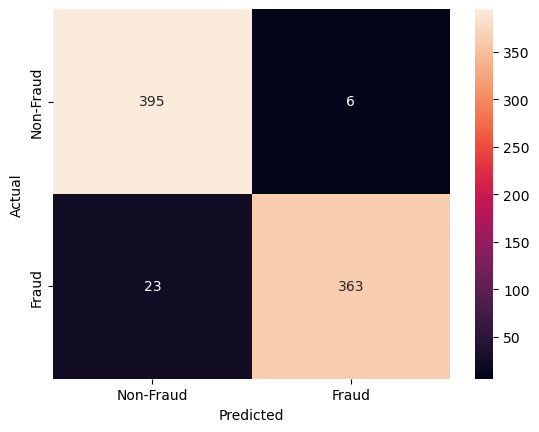

In [40]:
# Confustion Matrix for training set

train_cm = confusion_matrix(y_train, y_train_pred)
ticks = ['Non-Fraud', 'Fraud']
sns.heatmap(train_cm, annot=True, fmt='').set(xlabel='Predicted', ylabel='Actual', xticklabels=ticks, yticklabels=ticks)

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 [Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')],
 [Text(0, 0.5, 'Non-Fraud'), Text(0, 1.5, 'Fraud')]]

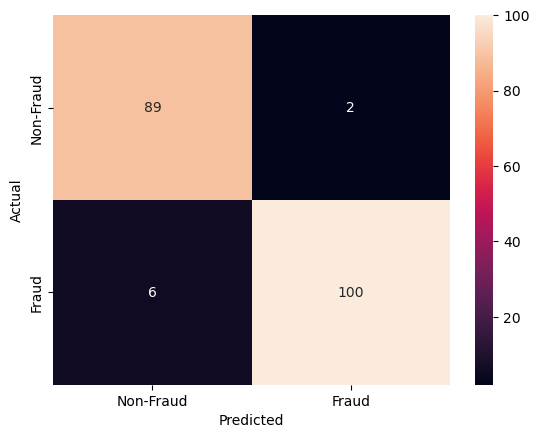

In [41]:
# Confustion Matrix for testing set

test_cm = confusion_matrix(y_test, y_test_pred)
ticks = ['Non-Fraud', 'Fraud']
sns.heatmap(test_cm, annot=True, fmt='').set(xlabel='Predicted', ylabel='Actual', xticklabels=ticks, yticklabels=ticks)

# Over Sampling

In [42]:
# over sampling

from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_os, y_os = smote.fit_resample(x, y)

In [43]:
y_os.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

# Evaluate the Model

In [44]:
def evaluate_model(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    print(f'Score: Train={train_score} & Test={test_score}')

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    print(f'F1: Train={train_f1} & Test={test_f1}')

    train_p = precision_score(y_train, y_train_pred)
    test_p = precision_score(y_test, y_test_pred)
    print(f'Precision: Train={train_p} & Test={test_p}')

    train_r = recall_score(y_train, y_train_pred)
    test_r = recall_score(y_test, y_test_pred)
    print(f'Recall: Train={train_r} & Test={test_r}')

In [45]:
evaluate_model(LogisticRegression(), x_os, y_os)

Score: Train=0.9445157659638077 & Test=0.9452543833424195
F1: Train=0.9427142202188843 & Test=0.9436917789635525
Precision: Train=0.973715920013128 & Test=0.9739396654719236
Recall: Train=0.913625705524981 & Test=0.915266131012947


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
evaluate_model(DecisionTreeClassifier(), x_us, y_us)

Score: Train=1.0 & Test=0.934010152284264
F1: Train=1.0 & Test=0.9365853658536586
Precision: Train=1.0 & Test=0.9696969696969697
Recall: Train=1.0 & Test=0.9056603773584906
